In [1]:
# On va importer les bibliothèques requises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import PIL, cv2
from PIL import Image, ImageOps
from scipy.ndimage import gaussian_filter





In [2]:
# Importation du dataset avec les 3 catégories différentes 
df = pd.read_csv("dataset_categories.csv")

In [3]:
df.drop(columns=['Unnamed: 0'],inplace= True)

In [4]:
# Creation d'une copie
data = df.copy()

In [5]:
# Verification du dataset
data[['description','image','category_general']]

,description,image,category_general
0,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [6]:
# Creation les fichiers appropriés directement sur notebook local
data['image'] = data['image'].apply(lambda x: "../Images/"+str(x))

In [7]:
data['image'] # verification

0       ../Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       ../Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2       ../Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3       ../Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4       ../Images/6325b6870c54cd47be6ebfbffa620ec7.jpg
                             ...                      
1045    ../Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    ../Images/fd6cbcc22efb6b761bd564c28928483c.jpg
1047    ../Images/5912e037d12774bb73a2048f35a00009.jpg
1048    ../Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    ../Images/f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1050, dtype: object

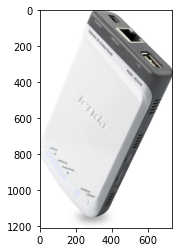

In [8]:
# Affichage d'une image
plt.imshow(Image.open(data['image'][369]))
plt.savefig("mes_images/noir_blanchet.png")

In [9]:
data

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_general,category_classic,category_detailed,CategoryId
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,../Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,../Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,../Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,../Images/d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,../Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,STIE88ZGTX65GH4V,1399.0,999.0,../Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,STIEC889ZD5GDCVQ,4930.0,1896.0,../Images/fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,0
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,STIE5UVGW2JWVWCT,4500.0,1449.0,../Images/5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,STIEC

## Prétraitement

In [10]:
#Sauvegarde du dataset
data_echantillon = data.copy()


In [11]:
# Prenons par example num 27
image_echantillon = data_echantillon.iloc[27]

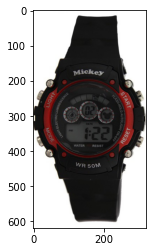

In [12]:
# Affichage d'photo
plt.imshow(Image.open(image_echantillon['image']))

In [13]:
image_echantillon # features dans dataset qui caractérisent le produit

uniq_id                                     7c4fec2331da8d40f2cb146eb198cb57
crawl_timestamp                                    2015-12-04 07:25:36 +0000
product_url                http://www.flipkart.com/disney-dw100405-digita...
product_name                       Disney DW100405 Digital Watch  - For Boys
pid                                                         WATEBYJABFE8WYTN
retail_price                                                          1495.0
discounted_price                                                      1345.0
image                         ../Images/7c4fec2331da8d40f2cb146eb198cb57.jpg
is_FK_Advantage_product                                                False
description                Disney DW100405 Digital Watch  - For Boys - Bu...
product_rating                                           No rating available
overall_rating                                           No rating available
brand                                                                    NaN

#### Réduction de bruit

In [14]:
from scipy.ndimage import gaussian_filter

In [15]:
im = np.array(Image.open(image_echantillon['image']))


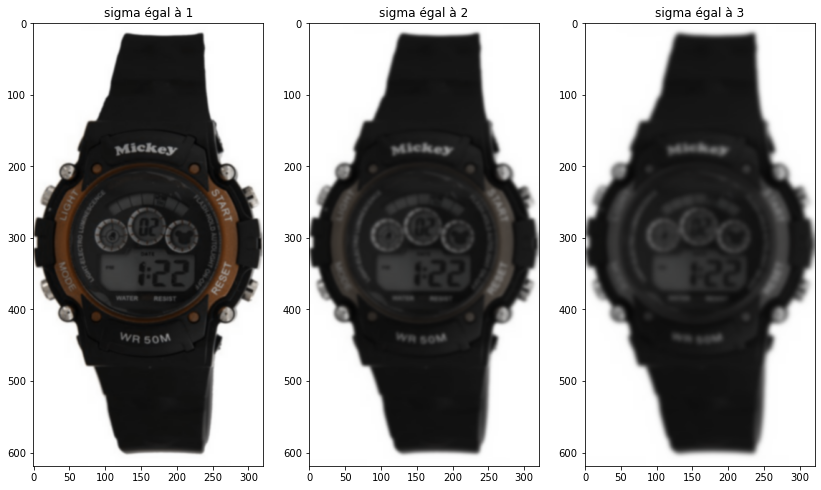

In [16]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
plt.title('sigma égal à 1')
plt.imshow(Image.fromarray(gaussian_filter(im, sigma=1)))
plt.subplot(1,3,2)
plt.title('sigma égal à 2')
plt.imshow(Image.fromarray(gaussian_filter(im, sigma=2)))
plt.subplot(1,3,3)
plt.title('sigma égal à 3')
plt.imshow(Image.fromarray(gaussian_filter(im, sigma=3)))
plt.savefig('mes_images/gauss.png')

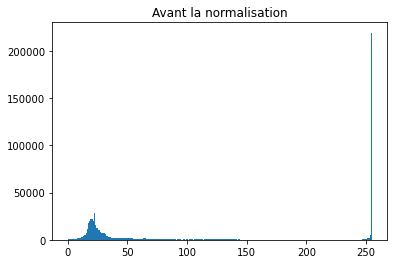

"\nLes pixels de l'image trop sombre, \nse concentrent dans la partie gauche  de l'histogramme.\n"

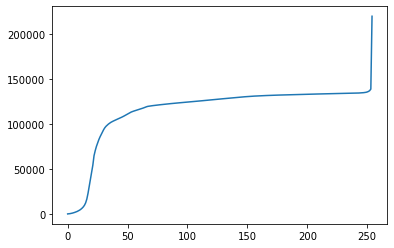

In [17]:
# Générer et afficher l'histogramme

plt.figure(figsize=(6,4))
plt.title('Avant la normalisation')
n, bins, patches = plt.hist(im.flatten(), bins=range(256))
plt.savefig("mes_images/normal_img_2.png")
plt.show()

cdf = n.cumsum() # histogramme cumulé 
cdf_normalized = cdf * n.max() / cdf.max()
plt.plot(cdf_normalized)
plt.savefig("mes_images/normal_img.png")

"""
Les pixels de l'image trop sombre, 
se concentrent dans la partie gauche  de l'histogramme.
"""

In [18]:
#Équilibrons le pour voir la differance
im = ImageOps.equalize(Image.fromarray(im), mask = None)

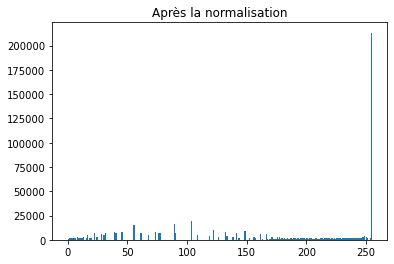

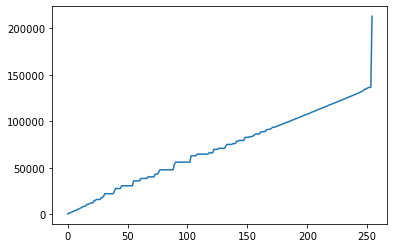

In [19]:
# Afichage après la normalisation
plt.figure(figsize=(6,4))
plt.title('Après la normalisation')
n, bins, patches = plt.hist(np.array(im).flatten(), bins=range(256))
plt.savefig("mes_images/normal_img_3.png")
plt.show()

"""
La somme des pixels cumulé 
normalement on doit avoir une ligne droit as y =ax
"""
cdf = n.cumsum()
cdf_normalized = cdf * n.max() / cdf.max()
plt.plot(cdf_normalized)
plt.savefig("mes_images/normal_img_4.png")

In [20]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = im.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 321 px, hauteur : 619 px


Largeur : 224 px, hauteur : 224 px


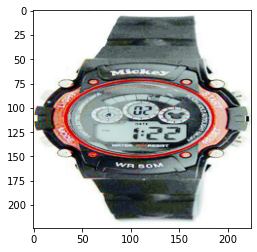

In [21]:
# Changement des  dimensions
resize_img = im.resize([224,224])
print("Largeur : {} px, hauteur : {} px".format(np.array(resize_img).shape[1], np.array(resize_img).shape[0]))
plt.imshow(resize_img)
plt.savefig('mes_images/resize.png')

# Prétraitement du dataset

#### Nous allons répéter les mêmes étapes pour toutes les images du dataser.

In [22]:
# cette fois on va utiliser une autre bibliothèque 
def redim(image, width, height):
    im = cv2.resize(np.array(image), dsize=(width,height))
    return im

In [23]:
def preprocess(image, path=False):
    '''
    * prétraitement des images:
    * noir et blanc
    * filtre gaussian
    * égalisation de l'histogramme
    * redimensionnement
    * prend un entrée le chemin vers l'image et en sortie la matrice np.array de l'image traitée
    '''
    #ouverture du fichier
    if path == False: #si on a fourni un array en entree :
        im = image
        
    else: #si on a fourni un chemin vers le fichier en entree:
        im = np.array(Image.open(image))
    
    #greyscale
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

    # gaussien
    im = gaussian_filter(im, sigma=2)
    
    #égalisation

    im = ImageOps.equalize(Image.fromarray(im), mask = None)
    
    return redim(im, 224, 224)

# Extraction des caractéristiques ORB

In [24]:
# Choix d'image par hasard 
i = np.random.randint(data_echantillon.shape[0]-1)
img_orb = preprocess(data_echantillon.iloc[i]['image'], path=True)

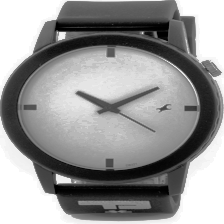

In [25]:
Image.fromarray(img_orb)

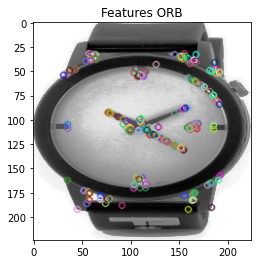

In [26]:
orb = cv2.ORB_create()

#trouver des points clés et des descripteurs
kp, des = orb.detectAndCompute(img_orb, mask = None)
#dessiner uniquement l'emplacement des points clés, pas la taille et l'orientation
image_orb = cv2.drawKeypoints(img_orb, kp, outImage = True, flags=2)
plt.title('Features ORB')
plt.imshow(image_orb)
plt.show()


# On va appliquer à toutes les images

In [27]:
# Renvoie la liste des matrices d\'images à partir d'une liste de chemins
def get_files(path_list):
   
    liste_image = []
    for image_path in path_list:
        im = np.array(Image.open(image_path))
        liste_image.append(im)
    return liste_image

In [28]:
#Initialise un algorithme ORB
def create_features():
    return cv2.ORB_create()
    
# renvoie les keypoints et descripteurs d\'une image à partir du détecteur ORB
def features(orb, image):
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return [keypoints, descriptors]

    * traitement complet d\'une image : 
    * initialise l\'algorithme, 
    * prétraite l'image, 
    * recherche les features

In [29]:
def pipeline_feature(image):
    orb = create_features()
    image = preprocess(image, path=False)
    keypoints, descriptors = features(orb, image)
    return keypoints, descriptors

#### Retrouvons des valeurs keypoints, descriptors

In [30]:
echantillon = get_files(data_echantillon['image'].tolist())
liste_keypoints = []
liste_descripteurs = []


for array_image in echantillon:
    kp, des = pipeline_feature(array_image)
    liste_keypoints.append(kp)
    liste_descripteurs.append(des)


C:\Users\vasub\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [31]:
# Voici les discripteurs trouvées pour chaque image
print("La taille de la liste :",len(liste_descripteurs))
print("Les dimensions des premiere 5 descripteurs  :",[liste_descripteurs[i].shape for i in range(5)] )
liste_descripteurs

La taille de la liste : 1050
Les dimensions des premiere 5 descripteurs  : [(393, 32), (398, 32), (419, 32), (420, 32), (413, 32)]


[array([[230, 239, 245, ..., 243, 210,   8],
        [223, 255,  46, ..., 247, 171,  87],
        [164, 109,  74, ...,  91, 235, 136],
        ...,
        [208,  33,   7, ...,   8,  33,   0],
        [214,  94, 158, ..., 113,  45,  67],
        [203, 114,  43, ..., 166,   3, 113]], dtype=uint8),
 array([[ 87, 255, 229, ..., 246, 149, 125],
        [  2, 172, 150, ...,  64, 139, 138],
        [  8, 157,  19, ...,   0, 165, 187],
        ...,
        [118, 123,  16, ...,  47,  14,  23],
        [ 13, 251, 173, ...,  38,  13, 253],
        [ 15, 219, 253, ..., 183, 141, 253]], dtype=uint8),
 array([[185,  84, 123, ..., 245, 202, 241],
        [ 84,  96, 147, ..., 115,  39, 134],
        [205,  94, 248, ..., 213, 207, 253],
        ...,
        [190, 117, 180, ..., 126, 174, 223],
        [111, 183, 189, ..., 254,  30,  95],
        [143, 251, 217, ..., 250, 137, 169]], dtype=uint8),
 array([[ 51, 148, 206, ...,  32,  91, 145],
        [153, 223, 107, ..., 186, 112, 249],
        [ 43, 21

In [32]:
# Détermination dimension maximum
nb_features_max = 0
liste_descripteurs_formates = []

for descripteur in liste_descripteurs:
    if descripteur.shape[0] > nb_features_max:
        nb_features_max = descripteur.shape[0]
        
# On transforme les array des descripteurs en vecteurs (PM : un descripteur = 32 pixels de large)
liste_descripteurs_flatten = []
for descripteur in liste_descripteurs:
    liste_descripteurs_flatten.append(descripteur.reshape(1,-1))   
    
# Rajout pixels noirs pour obtenir la même nombres de features
for descripteur in liste_descripteurs_flatten:
    if descripteur.shape[0] <= nb_features_max*32:
        liste_descripteurs_formates.append(np.hstack([descripteur.reshape(1,-1), 
                                                      np.zeros(nb_features_max*32 - descripteur.shape[1]).reshape(1,-1)]))        
    else:
        liste_descripteurs_formates.append(descripteur)
        
# Assemblage_features        
array_descripteurs = np.vstack(liste_descripteurs_formates)

In [33]:
# Verif
print(array_descripteurs.shape)
array_descripteurs

(1050, 14336)


array([[230., 239., 245., ...,   0.,   0.,   0.],
       [ 87., 255., 229., ...,   0.,   0.,   0.],
       [185.,  84., 123., ...,   0.,   0.,   0.],
       ...,
       [198., 122., 168., ...,   0.,   0.,   0.],
       [209.,  79.,  86., ...,   0.,   0.,   0.],
       [ 77., 124., 186., ...,   0.,   0.,   0.]])

# Classifieurs supervisés

In [34]:
# Dataframe des donnes
data_features = pd.DataFrame(data = array_descripteurs, columns=[str('feature_')+str(i) for i in range(array_descripteurs.shape[1])])


In [35]:
# Affichage 
data_features.sample(3)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14326,feature_14327,feature_14328,feature_14329,feature_14330,feature_14331,feature_14332,feature_14333,feature_14334,feature_14335
979,65.0,163.0,220.0,241.0,236.0,168.0,233.0,23.0,174.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,200.0,190.0,156.0,179.0,170.0,137.0,20.0,158.0,178.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,141.0,120.0,145.0,241.0,38.0,203.0,35.0,20.0,86.0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# On voit des features inutiles a la fin du dataset
data_features.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,1050.0,110.840952,77.640309,0.0,42.00,101.0,176.0,255.0
feature_1,1050.0,138.739048,69.084373,0.0,84.00,149.0,190.0,255.0
feature_2,1050.0,139.038095,71.930181,0.0,87.00,125.5,206.0,255.0
feature_3,1050.0,160.141905,68.010779,0.0,101.00,165.0,223.0,255.0
feature_4,1050.0,144.566667,71.579110,0.0,91.25,146.0,212.0,255.0
...,...,...,...,...,...,...,...,...
feature_14331,1050.0,0.083810,2.715739,0.0,0.00,0.0,0.0,88.0
feature_14332,1050.0,0.144762,4.690822,0.0,0.00,0.0,0.0,152.0
feature_14333,1050.0,0.013333,0.432049,0.0,0.00,0.0,0.0,14.0
feature_14334,1050.0,0.168571,5.462339,0.0,0.00,0.0,0.0,177.0


In [37]:
# Determination des features qui ont 50% == 0
data_features.describe().T['50%'] != 0.0

feature_0         True
feature_1         True
feature_2         True
feature_3         True
feature_4         True
                 ...  
feature_14331    False
feature_14332    False
feature_14333    False
feature_14334    False
feature_14335    False
Name: 50%, Length: 14336, dtype: bool

In [38]:
# Ellimination (on obtien dataset.shape = (1050,12832))
data_transpose = data_features.T[(data_features.describe().T['50%'] != 0.0)]

In [39]:
# On va faire un "update" du dataset
data_features = data_transpose.T
data_features.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12822,feature_12823,feature_12824,feature_12825,feature_12826,feature_12827,feature_12828,feature_12829,feature_12830,feature_12831
0,230.0,239.0,245.0,127.0,248.0,35.0,94.0,175.0,19.0,179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87.0,255.0,229.0,223.0,186.0,144.0,175.0,189.0,154.0,218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,185.0,84.0,123.0,69.0,98.0,62.0,125.0,18.0,113.0,98.0,...,186.0,232.0,123.0,89.0,13.0,63.0,219.0,119.0,143.0,215.0
3,51.0,148.0,206.0,93.0,62.0,38.0,233.0,123.0,58.0,235.0,...,165.0,78.0,78.0,175.0,243.0,132.0,229.0,224.0,119.0,249.0
4,140.0,87.0,81.0,220.0,146.0,114.0,150.0,31.0,16.0,194.0,...,100.0,192.0,71.0,89.0,186.0,130.0,87.0,140.0,85.0,255.0


In [40]:
# Verif de taux de remplissage 
data_features.sum(axis=0).sort_values()/np.max(data_features.sum(axis=0))

feature_12800    0.326700
feature_12736    0.350970
feature_12768    0.357714
feature_12811    0.358316
feature_12608    0.359137
                   ...   
feature_375      0.995697
feature_311      0.996277
feature_23       0.997362
feature_1271     0.997390
feature_2071     1.000000
Length: 12832, dtype: float64

In [41]:
data_features.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,1050.0,110.840952,77.640309,0.0,42.00,101.0,176.0,255.0
feature_1,1050.0,138.739048,69.084373,0.0,84.00,149.0,190.0,255.0
feature_2,1050.0,139.038095,71.930181,0.0,87.00,125.5,206.0,255.0
feature_3,1050.0,160.141905,68.010779,0.0,101.00,165.0,223.0,255.0
feature_4,1050.0,144.566667,71.579110,0.0,91.25,146.0,212.0,255.0
...,...,...,...,...,...,...,...,...
feature_12827,1050.0,68.088571,84.315495,0.0,0.00,1.5,132.0,255.0
feature_12828,1050.0,65.085714,80.819741,0.0,0.00,10.5,128.0,255.0
feature_12829,1050.0,71.217143,89.642934,0.0,0.00,3.0,140.0,255.0
feature_12830,1050.0,69.014286,84.163516,0.0,0.00,7.0,131.0,255.0


In [42]:
# Changement de type (on va  normaliser les donnes plus tard)
data_features = data_features.astype("float32")

In [43]:
# Normalisation
data_features = data_features/255

In [44]:
data_echantillon.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_general,category_classic,category_detailed,CategoryId
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,../Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,../Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0


In [45]:
# Target pour le dataset
data_echantillon['category_general'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: category_general, dtype: int64

In [46]:
# Sauvegarde du dataset 
data_target = data_features.copy()

In [47]:
# Rajout des targets 
data_target['target'] = data_echantillon['category_general'].to_list()

In [48]:
# Affichage
data_target.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12823,feature_12824,feature_12825,feature_12826,feature_12827,feature_12828,feature_12829,feature_12830,feature_12831,target
0,0.901961,0.937255,0.960784,0.498039,0.972549,0.137255,0.368627,0.686275,0.074510,0.701961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Home Furnishing
1,0.341176,1.000000,0.898039,0.874510,0.729412,0.564706,0.686275,0.741176,0.603922,0.854902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Baby Care
2,0.725490,0.329412,0.482353,0.270588,0.384314,0.243137,0.490196,0.070588,0.443137,0.384314,...,0.909804,0.482353,0.349020,0.050980,0.247059,0.858824,0.466667,0.560784,0.843137,Baby Care
3,0.200000,0.580392,0.807843,0.364706,0.243137,0.149020,0.913725,0.482353,0.227451,0.921569,...,0.305882,0.305882,0.686275,0.952941,0.517647,0.898039,0.878431,0.466667,0.976471,Home Furnishing
4,0.549020,0.341176,0.317647,0.862745,0.572549,0.447059,0.588235,0.121569,0.062745,0.760784,...,0.752941,0.278431,0.349020,0.729412,0.509804,0.341176,0.549020,0.333333,1.000000,Home Furnishing


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
# Transformation string en int
le = LabelEncoder()
data_target['target']= le.fit_transform(data_target['target'])

# LinearDiscriminantAnalysis

In [51]:
clf=LDA() 
lda_t = clf.fit_transform(data_features, data_target['target'])

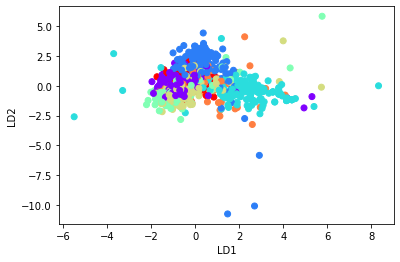

In [52]:
# Répartition des données en 2-D
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(lda_t[:,0],lda_t[:,1],c=data_target['target'],cmap='rainbow') # ,edgecolors='r'
plt.savefig('mes_images/Répartition.png')

In [53]:
# partageons le dataset en 2 parties (train et test split)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target['target'], test_size=0.22, random_state=2)

In [54]:
y_pred = clf.predict(X_test) # les résultats de la partie test
y_pred

array([1, 3, 4, 3, 4, 2, 3, 1, 4, 1, 5, 5, 3, 0, 1, 3, 1, 3, 5, 5, 6, 6,
       1, 6, 2, 0, 2, 5, 2, 4, 3, 5, 4, 1, 4, 2, 4, 2, 0, 3, 5, 0, 5, 0,
       4, 0, 4, 4, 5, 5, 6, 5, 2, 6, 4, 2, 6, 2, 1, 2, 6, 0, 6, 2, 6, 5,
       1, 5, 2, 5, 3, 5, 0, 3, 2, 2, 1, 0, 1, 5, 3, 2, 5, 1, 6, 0, 6, 6,
       4, 2, 0, 6, 4, 1, 4, 0, 1, 6, 5, 4, 2, 2, 0, 2, 1, 6, 3, 5, 5, 1,
       6, 3, 0, 6, 5, 4, 1, 4, 5, 1, 6, 6, 1, 5, 6, 3, 2, 2, 2, 2, 0, 1,
       1, 5, 3, 2, 2, 4, 3, 6, 3, 5, 5, 5, 1, 4, 3, 1, 4, 6, 2, 6, 3, 2,
       6, 0, 4, 4, 5, 3, 2, 2, 2, 0, 2, 5, 4, 4, 6, 1, 2, 4, 2, 3, 1, 2,
       0, 1, 4, 5, 5, 0, 3, 2, 1, 4, 4, 2, 4, 2, 5, 1, 5, 2, 4, 0, 2, 1,
       0, 4, 5, 1, 6, 4, 3, 3, 0, 0, 3, 5, 5, 6, 6, 4, 3, 5, 0, 4, 2, 6,
       5, 6, 3, 5, 0, 5, 2, 4, 5, 1, 1])

In [55]:
# Accuracy_score
print("Accuracy: %.2f%%" % (accuracy_score(y_test,y_pred)*100))

Accuracy: 80.52%


In [56]:
# Classification report
print('CLASSIFICATIION METRICS')
print(classification_report(y_test, y_pred, 
                                    target_names= df['category_general'].unique()))

CLASSIFICATIION METRICS
                            precision    recall  f1-score   support

           Home Furnishing       0.84      0.70      0.76        30
                 Baby Care       0.81      0.81      0.81        32
                   Watches       0.76      0.86      0.81        36
Home Decor & Festive Needs       0.89      0.75      0.81        32
          Kitchen & Dining       0.86      0.94      0.90        32
  Beauty and Personal Care       0.80      0.85      0.83        39
                 Computers       0.70      0.70      0.70        30

                  accuracy                           0.81       231
                 macro avg       0.81      0.80      0.80       231
              weighted avg       0.81      0.81      0.80       231



In [57]:
cm =confusion_matrix(y_test,y_pred) # observons les résultats 

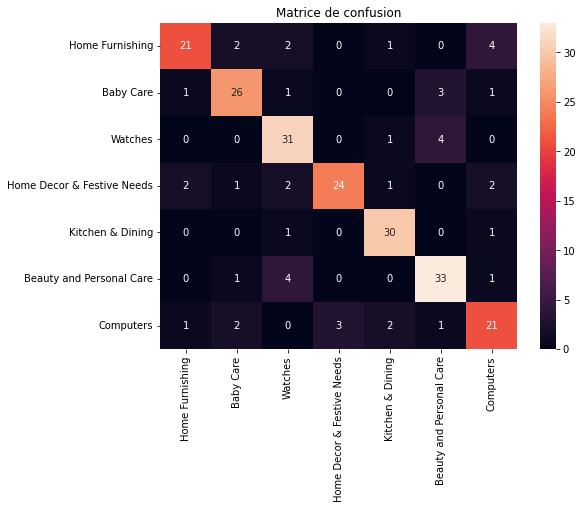

In [58]:
# Affichage
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=df['category_general'].value_counts().keys(), 
            yticklabels=df['category_general'].value_counts().keys())
plt.title('Matrice de confusion')
plt.savefig('mes_images/mat_img.png')

# Prédiction 

In [59]:
n=48 # mettre n'importe quel chiffre de 0 à 1049

In [60]:
clf.predict([data_features.loc[n].ravel()]) # transf vecteur 

array([5])

In [61]:
le.inverse_transform(clf.predict([data_features.loc[n].ravel()])) # récupération la description

array(['Kitchen & Dining'], dtype=object)

Text(0.5, 1.0, 'Kitchen & Dining')

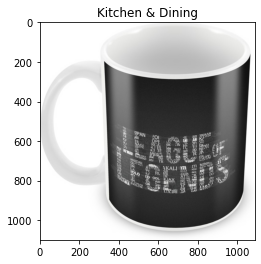

In [62]:
# Affichage d'image
plt.imshow(Image.open(data.loc[n,"image"]))
plt.title(data.loc[n,"category_general"])

# 

# Classifieurs non supervisés

In [63]:
# Sauvegarde du dataset
data = data_features.copy()

# PCA

In [64]:
std = StandardScaler() # Standartisation
X_norm=std.fit_transform(data)
X_norm = pd.DataFrame(data=X_norm,columns=data.columns)
X_norm.dropna(inplace=True)

In [65]:
pca=PCA(n_components=0.95)# Détermination des variations et le nombre maximale des features pour attendre 95%
pca.fit(X_norm)

PCA(n_components=0.95)

In [66]:
# Avec 872 features on va garder les caractéristiques du dataset à 95% 
pca_projection = pca.transform(X_norm)
pca_projection.shape


(1050, 872)

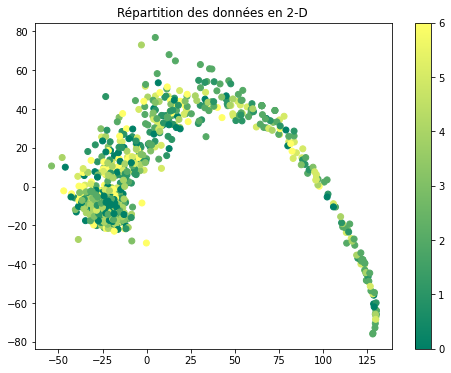

In [67]:
# Répartition des données en 2-D
plt.figure(figsize=(8,6))
plt.scatter(pca_projection[:,0],pca_projection[:,1], c=data_target['target'], cmap='summer')
plt.title('Répartition des données en 2-D ')
plt.colorbar()

plt.savefig('mes_images/repar_2d_img_pca.png')

In [68]:
# Les  features avec les meilleures scores
loading_scores = pd.Series(pca.components_[0],index=X_norm.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
sorted_loading_scores


feature_10787    0.015227
feature_10922    0.015078
feature_10800    0.014978
feature_11331    0.014973
feature_10794    0.014967
                   ...   
feature_1984     0.000003
feature_1225     0.000002
feature_2562     0.000002
feature_1228     0.000002
feature_1873     0.000002
Length: 12832, dtype: float32

In [69]:
 # Nouveau dataset avec la dimension 1050,138
data_img = data_features[sorted_loading_scores.index.values[:pca_projection.shape[1]]]
data_img.shape

(1050, 872)

# K-means

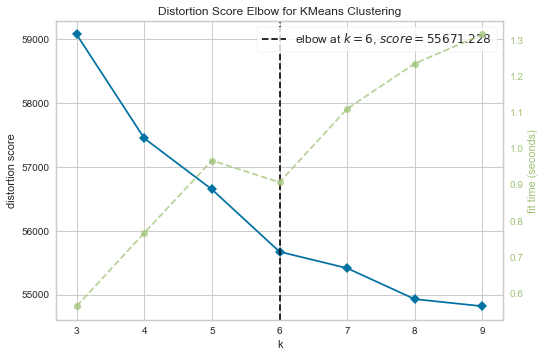

In [70]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Calcul de nombre de clusters
model_yellow = KMeans(random_state=2)
visualizer = KElbowVisualizer(model_yellow, k=(3,10))

visualizer.fit(data_img)    
visualizer.poof();   


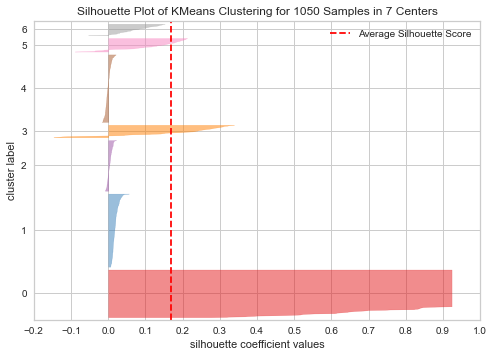

In [71]:
# Calcul de Silhouette avec 7 clusters (on category general on a 7 types de produits)
"""
coefficient très faible
"""
model_yellow = KMeans(7)
visualizer = SilhouetteVisualizer(model_yellow)

visualizer.fit(data_img)    
visualizer.poof();    

In [72]:
# Entrainement du modèle 
k_model = KMeans(7, random_state=2).fit(data_img)

In [73]:
y_kmeans = k_model.predict(data_img) # Labels
y_kmeans

array([5, 5, 5, ..., 0, 1, 5])

In [74]:
k_centr = k_model.cluster_centers_ # les coeff de centroïde 


In [75]:
k_centr.shape

(7, 872)

In [76]:
# Verif de presence de tout les type en catégorie general
np.unique(k_model.labels_)

array([0, 1, 2, 3, 4, 5, 6])

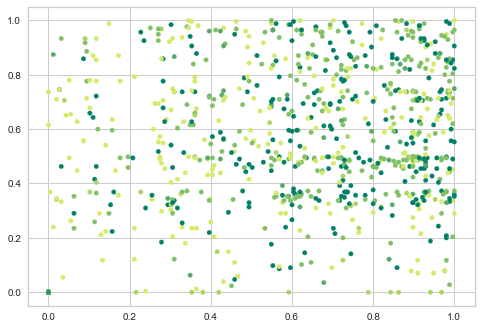

In [77]:
# Affichage
plt.scatter(data_img.iloc[:, 0], data_img.iloc[:, 1], c=y_kmeans, s=20, cmap='summer')
plt.savefig('mes_images/affich_2D.png')

In [78]:
# Rajout des clusters en dataset

data_echantillon['cluster'] = y_kmeans


In [79]:
data_echantillon[['cluster','category_general']]

,cluster,category_general
0,5,Home Furnishing
1,5,Baby Care
2,5,Baby Care
3,3,Home Furnishing
4,3,Home Furnishing
...,...,...
1045,3,Baby Care
1046,3,Baby Care
1047,0,Baby Care
1048,1,Baby Care


In [80]:
# La vision plus détaillée 
for i in range(7):
#     print("=="*50)
    print(data_echantillon[data_echantillon['cluster'] == i][['cluster','category_general']].value_counts())
    print("-"*50)

cluster  category_general          
0        Home Decor & Festive Needs    50
         Baby Care                     45
         Home Furnishing               39
         Kitchen & Dining              39
         Watches                       38
         Beauty and Personal Care      21
         Computers                     19
dtype: int64
--------------------------------------------------
cluster  category_general          
1        Computers                     79
         Kitchen & Dining              39
         Beauty and Personal Care      27
         Home Furnishing               12
         Baby Care                     10
         Home Decor & Festive Needs     8
         Watches                        6
dtype: int64
--------------------------------------------------
cluster  category_general          
2        Beauty and Personal Care      14
         Baby Care                      6
         Computers                      6
         Home Decor & Festive Needs     5
        

In [81]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
T = tsne.fit_transform(data_img.iloc[:,:-4])

C:\Users\vasub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


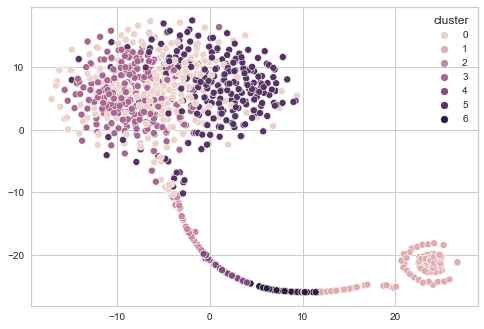

In [82]:
sns.scatterplot(T[:,0], T[:,1] ,hue =data_echantillon['cluster'])
plt.savefig('mes_images/esne.png')